In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

***Data Preprocessing***

In [8]:
df_train = pd.read_csv(r"C:\Users\shake\OneDrive\שולחן העבודה\datascience\deep_learning\RNN\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv")

In [52]:
training_set = df_train.iloc[:,1].values.reshape(-1, 1)
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled =  sc.fit_transform(training_set)

**now we create the training data. i chose for a timestep of 60 financial days which mean that the neural network would predict the next day's open price based on the last 60 days.**

In [54]:
X_train = []
y_train = []
time_step = 60
for i in range(time_step, len(training_set)):
    X_train.append(training_set_scaled[i- time_step:i, 0 ])
    y_train.append(training_set_scaled[i,0])
    

In [55]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [60]:
#reshaping the data. we can use more indicators if we want
number_of_indicators = 1 
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],number_of_indicators) )

In [65]:
#building the RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [71]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape =(X_train.shape[1],number_of_indicators) ))
regressor.add(Dropout(0.2)) 
regressor.add(LSTM(units = 50, return_sequences= True ))
regressor.add(Dropout(0.2)) 
regressor.add(LSTM(units = 50, return_sequences= True ))
regressor.add(Dropout(0.2)) 
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2)) 

#number of units in the output layer has to be equal to the number of dimentions
regressor.add(Dense(units = 1))
regressor.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])


In [73]:
history = regressor.fit(X_train, y_train, epochs= 100,
                       batch_size = 32)

Epoch 1/100
38/38 [==============================] - 17s 127ms/step - loss: 0.0355 - accuracy: 0.0017
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0065 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0062 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0051 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0051 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0045 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0047 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0060 - accur

38/38 [==============================] - 4s 106ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 82/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 83/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 84/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 85/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 86/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 87/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 88/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 89/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 90/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0014 - accuracy: 

<Axes: >

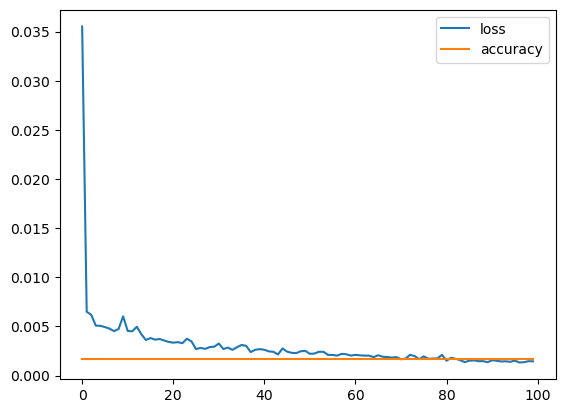

In [76]:
pd.DataFrame(history.history).plot()

**make predictions**

In [78]:
df_test = pd.read_csv(r"C:\Users\shake\OneDrive\שולחן העבודה\datascience\deep_learning\RNN\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv")

In [80]:
test_set = df_test.iloc[:,1].values.reshape(-1, 1)
test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [105]:
test_set_scaled =  sc.transform(test_set)
X_test = []
y_test = []
for i in range(len(test_set)):
    X_test.append(np.append(training_set_scaled[time_step *-1+i -1:-1,0],test_set_scaled[:i, 0]))
    y_test.append(test_set_scaled[i,0])

In [107]:
number_of_indicators = 1 
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],number_of_indicators) )
predicted_stock_prices = regressor.predict(X_test)

1/1 [==============================] - 0s 53ms/step


In [108]:
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

In [115]:
y_test = np.array(y_test).reshape(-1, 1)
y_test = sc.inverse_transform(y_test)

**visualizing our predictions**

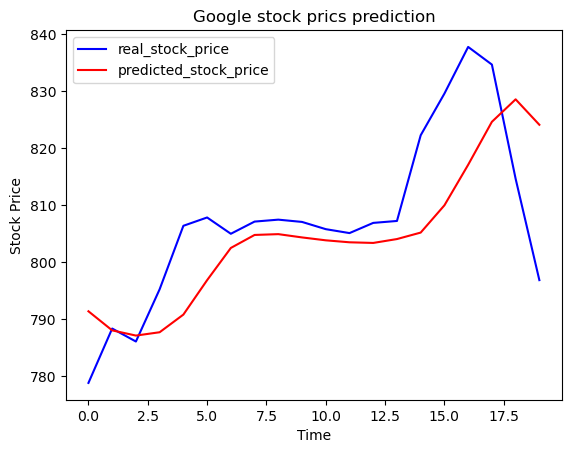

In [121]:
plt.plot(y_test, color = 'blue', label = 'real_stock_price')
plt.plot(predicted_stock_prices, color = 'red', label = 'predicted_stock_price')
plt.title("Google stock prics prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()